In [1]:
#airline data
#which customers are more satisfied.
import pandas as pd
import sqlite3 as sl
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df_reviews=pd.read_csv('test.csv')
df=pd.read_csv('train.csv')
df_reviews


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [3]:

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


(103904, 25)
Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int

In [4]:
#Finding missing values
total_cells = np.product(df.shape)

missing_cells = pd.isnull(df).sum()
#print(missing_cells)

total_missing = missing_cells.sum()
#print(total_missing)

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data") 

0.0 % Missing cells from the data


In [5]:
#df.columns

In [6]:
#to find the missing percentages
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

Unnamed: 0 - 0.0%
id - 0.0%
Gender - 0.0%
Customer Type - 0.0%
Age - 0.0%
Type of Travel - 0.0%
Class - 0.0%
Flight Distance - 0.0%
Inflight wifi service - 0.0%
Departure/Arrival time convenient - 0.0%
Ease of Online booking - 0.0%
Gate location - 0.0%
Food and drink - 0.0%
Online boarding - 0.0%
Seat comfort - 0.0%
Inflight entertainment - 0.0%
On-board service - 0.0%
Leg room service - 0.0%
Baggage handling - 0.0%
Checkin service - 0.0%
Inflight service - 0.0%
Cleanliness - 0.0%
Departure Delay in Minutes - 0.0%
Arrival Delay in Minutes - 0.3%
satisfaction - 0.0%


<Axes: >

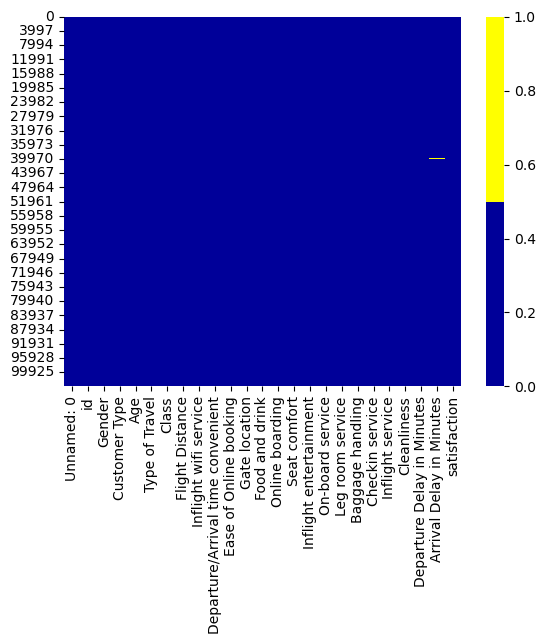

In [7]:
cols=df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sb.heatmap(df[cols].isnull(), cmap=sb.color_palette(colours))

created missing indicator for: Arrival Delay in Minutes


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Arrival Delay in Minutes_ismissing,num_missing
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,False,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,False,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,3,4,4,4,5,0,0.0,satisfied,False,0
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,False,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,4,4,3,3,3,0,0.0,satisfied,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,1,4,2,3,2,3,0.0,neutral or dissatisfied,False,0
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,4,0,0.0,satisfied,False,0
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,2,4,5,5,4,7,14.0,neutral or dissatisfied,False,0
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,5,1,5,4,1,0,0.0,neutral or dissatisfied,False,0


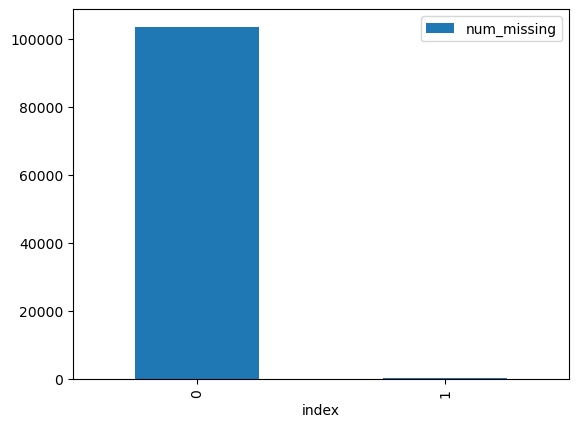

In [10]:
# Plotting a missing data histogram
# first creating missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
#         print(missing)


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
df


In [11]:
#no missing vales to be taken care of
df1=df.drop(columns=['Unnamed: 0', 'id', 'Inflight wifi service',
 'Departure/Arrival time convenient', 'Ease of Online booking',
 'Gate location' ,'Food and drink' ,'Online boarding', 'Seat comfort',
 'Inflight entertainment', 'Leg room service',
 'Baggage handling' ,'Checkin service' ,'Inflight service' ,'Cleanliness',
 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])

In [12]:
df1.sort_values(['satisfaction','Class']).head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,On-board service,satisfaction,Arrival Delay in Minutes_ismissing,num_missing
1,Male,disloyal Customer,25,Business travel,Business,235,1,neutral or dissatisfied,False,0
3,Female,Loyal Customer,25,Business travel,Business,562,2,neutral or dissatisfied,False,0
8,Female,Loyal Customer,41,Business travel,Business,853,1,neutral or dissatisfied,False,0
28,Female,Loyal Customer,36,Business travel,Business,3347,3,neutral or dissatisfied,False,0
34,Male,disloyal Customer,37,Business travel,Business,1182,4,neutral or dissatisfied,False,0
36,Female,disloyal Customer,34,Business travel,Business,883,5,neutral or dissatisfied,False,0
39,Male,disloyal Customer,41,Business travel,Business,354,3,neutral or dissatisfied,False,0
41,Female,disloyal Customer,25,Business travel,Business,1452,4,neutral or dissatisfied,False,0
46,Female,Loyal Customer,22,Personal Travel,Business,349,4,neutral or dissatisfied,False,0
47,Female,Loyal Customer,13,Business travel,Business,1522,3,neutral or dissatisfied,False,0


In [13]:
df1.sort_values(['satisfaction','Class']).tail(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,On-board service,satisfaction,Arrival Delay in Minutes_ismissing,num_missing
103306,Female,Loyal Customer,46,Business travel,Eco Plus,191,5,satisfied,False,0
103377,Female,Loyal Customer,32,Business travel,Eco Plus,1250,1,satisfied,False,0
103454,Female,Loyal Customer,49,Business travel,Eco Plus,438,3,satisfied,False,0
103578,Male,Loyal Customer,35,Business travel,Eco Plus,867,5,satisfied,False,0
103604,Male,Loyal Customer,24,Business travel,Eco Plus,1504,2,satisfied,False,0
103674,Female,Loyal Customer,41,Business travel,Eco Plus,391,4,satisfied,False,0
103683,Female,disloyal Customer,24,Business travel,Eco Plus,241,3,satisfied,False,0
103754,Female,Loyal Customer,56,Business travel,Eco Plus,132,5,satisfied,False,0
103877,Male,Loyal Customer,27,Business travel,Eco Plus,162,2,satisfied,False,0
103890,Female,Loyal Customer,56,Business travel,Eco Plus,550,3,satisfied,False,0


In [14]:
dissatisfied=df1.sort_values(['satisfaction']).head(10)
dissatisfied

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,On-board service,satisfaction,Arrival Delay in Minutes_ismissing,num_missing
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,4,neutral or dissatisfied,False,0
59684,Female,Loyal Customer,61,Personal Travel,Eco Plus,468,4,neutral or dissatisfied,False,0
59683,Female,Loyal Customer,57,Personal Travel,Eco,125,1,neutral or dissatisfied,False,0
59682,Female,disloyal Customer,37,Business travel,Eco,1204,3,neutral or dissatisfied,False,0
59681,Female,Loyal Customer,70,Personal Travel,Eco,1085,5,neutral or dissatisfied,False,0
59676,Male,Loyal Customer,19,Personal Travel,Eco,868,5,neutral or dissatisfied,False,0
59675,Female,Loyal Customer,54,Business travel,Business,3281,3,neutral or dissatisfied,False,0
59686,Male,disloyal Customer,28,Business travel,Eco,1262,3,neutral or dissatisfied,False,0
59673,Male,disloyal Customer,43,Business travel,Eco,693,3,neutral or dissatisfied,False,0
59670,Male,Loyal Customer,41,Personal Travel,Eco,590,1,neutral or dissatisfied,False,0


In [15]:
satisfied=df1.sort_values(['satisfaction']).tail(10)
satisfied

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,On-board service,satisfaction,Arrival Delay in Minutes_ismissing,num_missing
18559,Male,Loyal Customer,60,Business travel,Business,3028,5,satisfied,False,0
71342,Male,Loyal Customer,28,Business travel,Business,2378,2,satisfied,False,0
48142,Female,disloyal Customer,22,Business travel,Eco,588,5,satisfied,False,0
71344,Male,Loyal Customer,35,Business travel,Business,2489,4,satisfied,False,0
18556,Male,Loyal Customer,50,Business travel,Business,3926,5,satisfied,False,0
18555,Male,Loyal Customer,46,Business travel,Business,326,4,satisfied,False,0
71347,Male,Loyal Customer,39,Personal Travel,Eco,479,1,satisfied,False,0
18554,Female,Loyal Customer,52,Business travel,Business,1671,4,satisfied,False,0
18561,Male,Loyal Customer,8,Personal Travel,Eco Plus,1642,5,satisfied,False,0
70790,Male,Loyal Customer,57,Business travel,Business,377,4,satisfied,False,0


In [16]:
sat_type=satisfied.sort_values(['Class'])
sat_type

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,On-board service,satisfaction,Arrival Delay in Minutes_ismissing,num_missing
18559,Male,Loyal Customer,60,Business travel,Business,3028,5,satisfied,False,0
71342,Male,Loyal Customer,28,Business travel,Business,2378,2,satisfied,False,0
71344,Male,Loyal Customer,35,Business travel,Business,2489,4,satisfied,False,0
18556,Male,Loyal Customer,50,Business travel,Business,3926,5,satisfied,False,0
18555,Male,Loyal Customer,46,Business travel,Business,326,4,satisfied,False,0
18554,Female,Loyal Customer,52,Business travel,Business,1671,4,satisfied,False,0
70790,Male,Loyal Customer,57,Business travel,Business,377,4,satisfied,False,0
48142,Female,disloyal Customer,22,Business travel,Eco,588,5,satisfied,False,0
71347,Male,Loyal Customer,39,Personal Travel,Eco,479,1,satisfied,False,0
18561,Male,Loyal Customer,8,Personal Travel,Eco Plus,1642,5,satisfied,False,0


In [19]:
dissat_type=dissatisfied.sort_values(['Class'])
dissat_type

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,On-board service,satisfaction,Arrival Delay in Minutes_ismissing,num_missing
59675,Female,Loyal Customer,54,Business travel,Business,3281,3,neutral or dissatisfied,False,0
59683,Female,Loyal Customer,57,Personal Travel,Eco,125,1,neutral or dissatisfied,False,0
59682,Female,disloyal Customer,37,Business travel,Eco,1204,3,neutral or dissatisfied,False,0
59681,Female,Loyal Customer,70,Personal Travel,Eco,1085,5,neutral or dissatisfied,False,0
59676,Male,Loyal Customer,19,Personal Travel,Eco,868,5,neutral or dissatisfied,False,0
59686,Male,disloyal Customer,28,Business travel,Eco,1262,3,neutral or dissatisfied,False,0
59673,Male,disloyal Customer,43,Business travel,Eco,693,3,neutral or dissatisfied,False,0
59670,Male,Loyal Customer,41,Personal Travel,Eco,590,1,neutral or dissatisfied,False,0
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,4,neutral or dissatisfied,False,0
59684,Female,Loyal Customer,61,Personal Travel,Eco Plus,468,4,neutral or dissatisfied,False,0


In [17]:
#Most Loyal travellers who travelled in business are more satisfied , dissatisfied costomers are mostly travelled in Eco class
#satisfaction and dissatisfaction not related to flight distance.am going to check the correlation between few entries.

C:\Users\kavit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


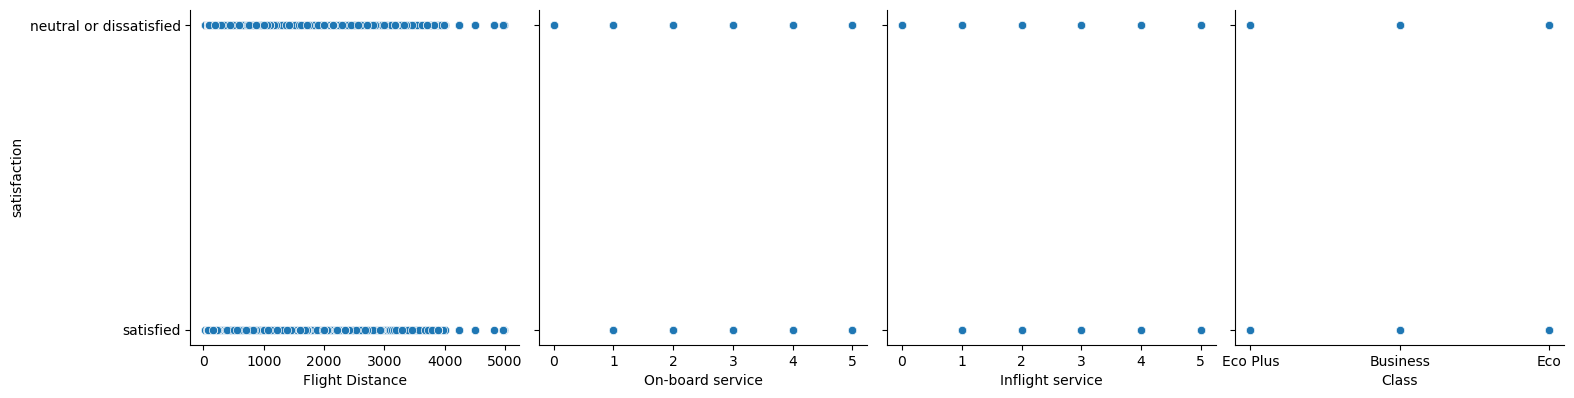

In [34]:
sb.pairplot( df,x_vars=['Flight Distance', 'On-board service','Inflight service','Class'], 
             y_vars='satisfaction', size=4, aspect=1, kind='scatter')
plt.show()

C:\Users\kavit\AppData\Local\Temp\ipykernel_2912\562994892.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(satisfied.corr(), cmap="YlGnBu", annot = True)


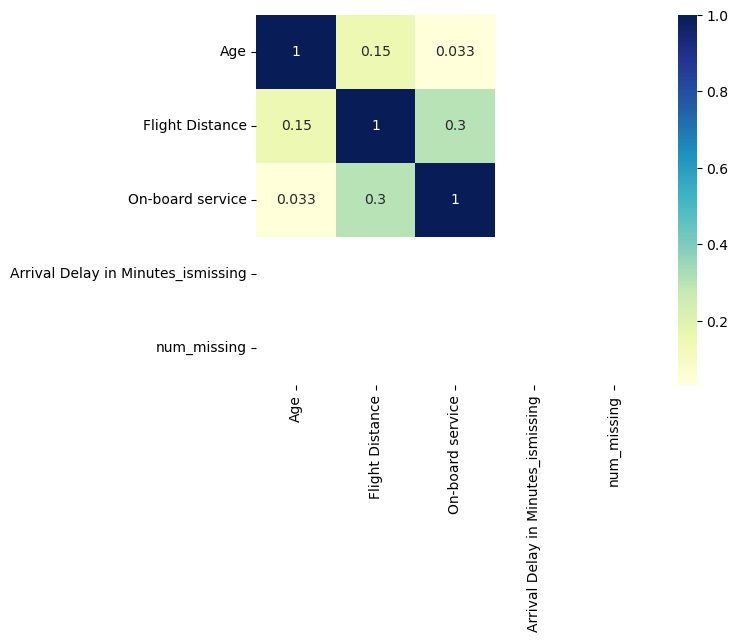

In [30]:
sb.heatmap(satisfied.corr(), cmap="YlGnBu", annot = True)
plt.show()

C:\Users\kavit\AppData\Local\Temp\ipykernel_2912\1759868895.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(dissatisfied.corr(), cmap="YlGnBu", annot = True)


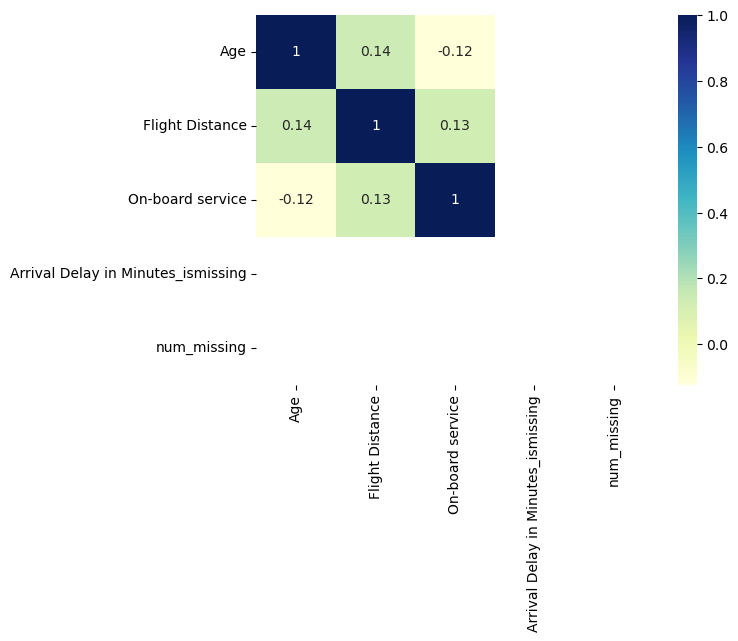

In [31]:
sb.heatmap(dissatisfied.corr(), cmap="YlGnBu", annot = True)
plt.show()